In [1]:
import itertools
import pandas as pd

import simulation, evaluation

# Empirical data

In [2]:
df = pd.read_csv("./data/all-weeks-countries.tsv", sep='\t')
df.week = pd.to_datetime(df.week)
df.loc[:, 'item_title'] = df.apply(lambda x: x.season_title if type(x.season_title)!=float else x.show_title, axis=1)
empirical = df[(df.country_name=="United States") & (df.category=="TV")]
empirical = empirical.drop(columns=['country_iso2', 'category', 'show_title', 'season_title'])
n_weeks = empirical.week.nunique()
n_items = empirical.item_title.nunique()

In [3]:
time_empirical = evaluation.time_on_list(empirical, "item_title", "week")
churn_empirical = evaluation.churn(empirical, "item_title", "week")
transitions_empirical = evaluation.movement_prob(empirical, "item_title", "week", "weekly_rank")

# Simulation param sweep

In [13]:
pop_params = [0.2, 0.5, 0.8]
pl_params = [1, 1.5, 2]
param_sweep = list(itertools.product(pop_params, pl_params))

100%|██████████| 36/36 [02:29<00:00,  4.16s/it]


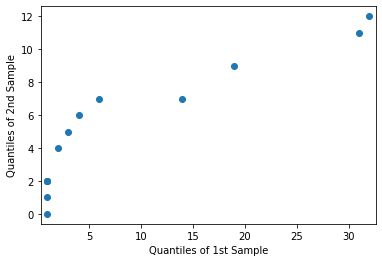

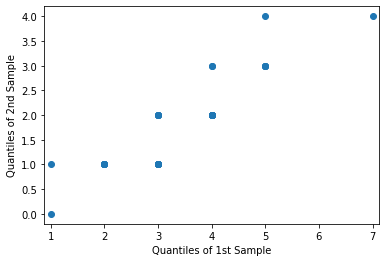

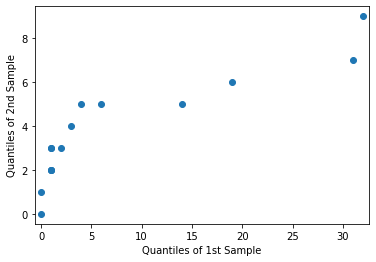

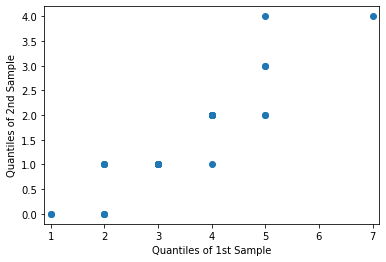

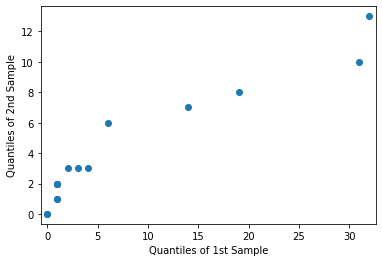

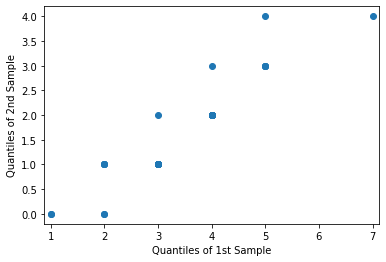

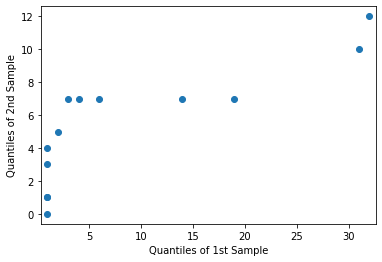

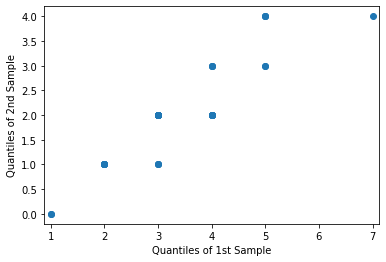

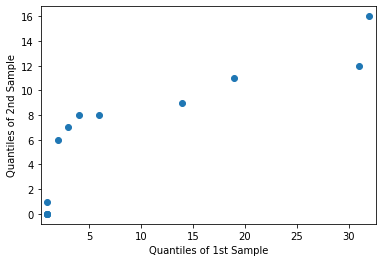

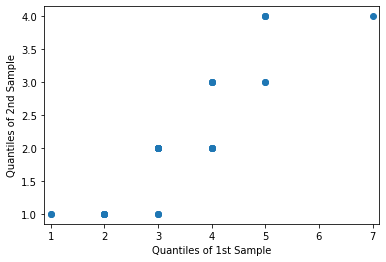

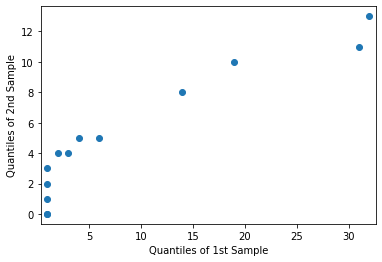

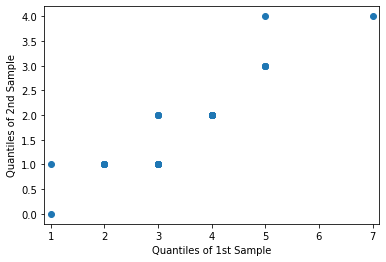

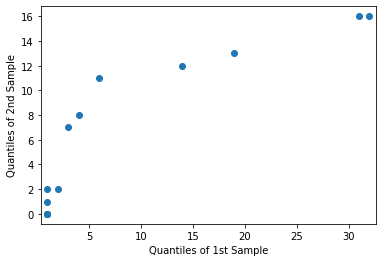

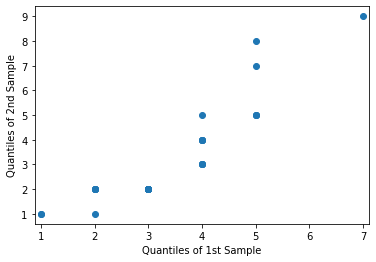

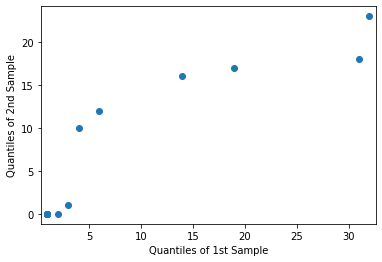

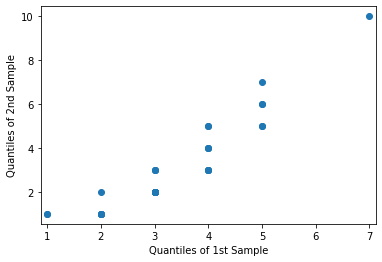

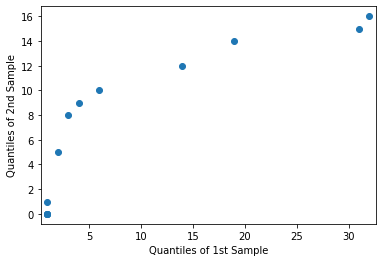

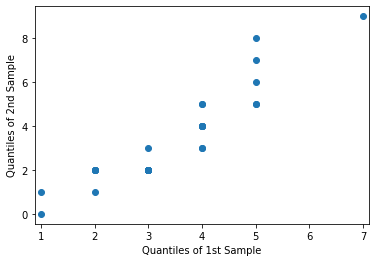

In [14]:
results = []
for pair in param_sweep:
    pop = pair[0]
    pl = pair[1]
    sim = simulation.Simulation(n_items, 100_000, n_weeks, pop, pl)
    sim.init_simulation()
    sim.run_simulation()
    time_sim = evaluation.time_on_list(sim.top_ten, "movie", "iteration")
    churn_sim = evaluation.churn(sim.top_ten, "movie", "iteration")
    transitions_sim = evaluation.movement_prob(sim.top_ten, "movie", "iteration", "rank")
    time_compare = evaluation.compare_distributions(time_empirical, time_sim)
    churn_compare = evaluation.compare_distributions(churn_empirical, churn_sim)
    transitions_compare = evaluation.compare_distributions(transitions_empirical, transitions_sim)
    results.append({'pop': pop, 
                    'pl': pl,
                    'time_qq': time_compare,
                    'churn_qq': churn_compare,
                    'mean_jsd': transitions_compare})    

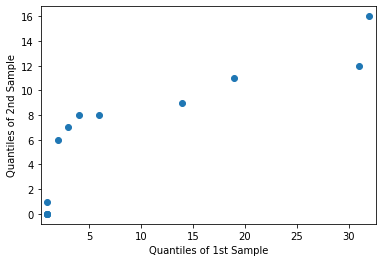

In [26]:
results.sort(key=lambda x: x['mean_jsd'])
results[0]['time_qq']

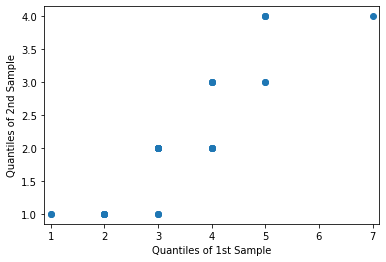

In [27]:
results[0]['churn_qq']